## Loan Approval Prediction - Model Training and Evaluation

This notebook develops and evaluates machine learning models to predict whether a loan application will be approved. The goal is to assist financial institutions in reducing credit risk by using data-driven classification models.


### Step 1: Import Libraries & Loan Data

In [12]:
# Import Required Libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt


# machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, auc
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, precision_recall_curve, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

# Load Processed Data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

### Step 2: Evaluation Function Definition

To consistently assess model performance, we define a custom evaluation function that outputs key classification metrics — Accuracy, Precision, Recall, and F1-Score — along with the confusion matrix. These metrics are especially important for loan approval prediction, where false positives (approving risky loans) must be minimized. 


In [2]:
acc_score = []
pre_score = []
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('F1 Score: ', f1_score(y_test, y_pred))
    print('\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred))
    print('\nClassification Report: \n', classification_report(y_test, y_pred))
    acc_score.append(accuracy_score(y_test, y_pred))
    pre_score.append(precision_score(y_test, y_pred))

### Step 3: Train Models

In this step, we train multiple classification algorithms — including Logistic Regression, Random Forest, and XGBoost — on the training dataset. These models represent a mix of linear, ensemble, and gradient boosting approaches, allowing us to compare performance across different learning paradigms. Each model will be evaluated using standard classification metrics to determine its effectiveness in predicting loan approvals.


In [3]:
# Train Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic Regression:')
evaluate_model(lr, X_test, y_test)

Logistic Regression:
Accuracy: 0.8407079646017699
Precision: 0.8191489361702128
Recall:  0.9871794871794872
F1 Score:  0.8953488372093024

Confusion Matrix: 
 [[18 17]
 [ 1 77]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.51      0.67        35
           1       0.82      0.99      0.90        78

    accuracy                           0.84       113
   macro avg       0.88      0.75      0.78       113
weighted avg       0.86      0.84      0.82       113



In [4]:
# Train Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print('Random Forest')
evaluate_model(rf, X_test, y_test)

Random Forest
Accuracy: 0.831858407079646
Precision: 0.8314606741573034
Recall:  0.9487179487179487
F1 Score:  0.8862275449101796

Confusion Matrix: 
 [[20 15]
 [ 4 74]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.57      0.68        35
           1       0.83      0.95      0.89        78

    accuracy                           0.83       113
   macro avg       0.83      0.76      0.78       113
weighted avg       0.83      0.83      0.82       113



In [5]:
# Train XGBClassifier Model 
xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state=42)
xgb.fit(X_train, y_train)
print("XGBoost")
evaluate_model(xgb, X_test, y_test)

XGBoost
Accuracy: 0.8053097345132744
Precision: 0.8255813953488372
Recall:  0.9102564102564102
F1 Score:  0.8658536585365854

Confusion Matrix: 
 [[20 15]
 [ 7 71]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.57      0.65        35
           1       0.83      0.91      0.87        78

    accuracy                           0.81       113
   macro avg       0.78      0.74      0.76       113
weighted avg       0.80      0.81      0.80       113



In [6]:
# Train Decision Tree Classifier Model

dc = DecisionTreeClassifier(random_state = 42)
dc.fit(X_train, y_train)
print('Decision Tree ')
evaluate_model(dc, X_test, y_test)

Decision Tree 
Accuracy: 0.7256637168141593
Precision: 0.821917808219178
Recall:  0.7692307692307693
F1 Score:  0.7947019867549668

Confusion Matrix: 
 [[22 13]
 [18 60]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.63      0.59        35
           1       0.82      0.77      0.79        78

    accuracy                           0.73       113
   macro avg       0.69      0.70      0.69       113
weighted avg       0.74      0.73      0.73       113



In [7]:
# Train a KNeighborsClassifier Model 

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('KNeighbor classifier')
evaluate_model(knn, X_test, y_test)

KNeighbor classifier
Accuracy: 0.7345132743362832
Precision: 0.7666666666666667
Recall:  0.8846153846153846
F1 Score:  0.8214285714285714

Confusion Matrix: 
 [[14 21]
 [ 9 69]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.40      0.48        35
           1       0.77      0.88      0.82        78

    accuracy                           0.73       113
   macro avg       0.69      0.64      0.65       113
weighted avg       0.72      0.73      0.72       113



In [8]:
# Train a Support Vertoc Machine Model

sv = SVC()
sv.fit(X_train, y_train)
print('SVC')
evaluate_model(sv, X_test, y_test)

SVC
Accuracy: 0.6902654867256637
Precision: 0.6902654867256637
Recall:  1.0
F1 Score:  0.8167539267015707

Confusion Matrix: 
 [[ 0 35]
 [ 0 78]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.69      1.00      0.82        78

    accuracy                           0.69       113
   macro avg       0.35      0.50      0.41       113
weighted avg       0.48      0.69      0.56       113




### Step 4: Hyperparameter Tuning

To improve model performance and ensure a fair comparison, we apply hyperparameter tuning to XGBClassifier and RandomForestClassifier model using `GridSearchCV`. This process allows us to systematically search across combinations of hyperparameters to find the configuration that optimizes our target metric — in this case, the F1-score, which balances precision and recall.

In [9]:
# Hyper parameter Tuning of RamdomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2']
}

rf = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(
    estimator =rf, 
    param_grid = param_grid,
    cv = 5,
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
print('Tuned RandomForest:')
evaluate_model(best_model, X_test, y_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Tuned RandomForest:
Accuracy: 0.8407079646017699
Precision: 0.8260869565217391
Recall:  0.9743589743589743
F1 Score:  0.8941176470588236

Confusion Matrix: 
 [[19 16]
 [ 2 76]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.54      0.68        35
           1       0.83      0.97      0.89        78

    accuracy                           0.84       113
   macro avg       0.87      0.76      0.79       113
weighted avg       0.85      0.84      0.83       113



In [10]:
# Hyperparameter tuning XGBClassifier model

param_grid = {
    'n_estimators':[100,200],
    'max_depth': [3, 4, 5],
    'learning_rate' : [0.01, 0.1],
    'subsample': [0.8,1]
}

grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder = False, eval_metric='logloss')
                               ,param_grid = param_grid, cv =5, scoring='f1', verbose=1, n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)
print('Best Parameters:', grid_search_xgb.best_params_)

# evaluate the best model
best_xgb = grid_search_xgb.best_estimator_
print('Tuned XGBoost: ')
evaluate_model(best_xgb, X_test, y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost: 
Accuracy: 0.8407079646017699
Precision: 0.8260869565217391
Recall:  0.9743589743589743
F1 Score:  0.8941176470588236

Confusion Matrix: 
 [[19 16]
 [ 2 76]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.54      0.68        35
           1       0.83      0.97      0.89        78

    accuracy                           0.84       113
   macro avg       0.87      0.76      0.79       113
weighted avg       0.85      0.84      0.83       113



#### Models Evaluations Using Accuracy Score and Precision Score

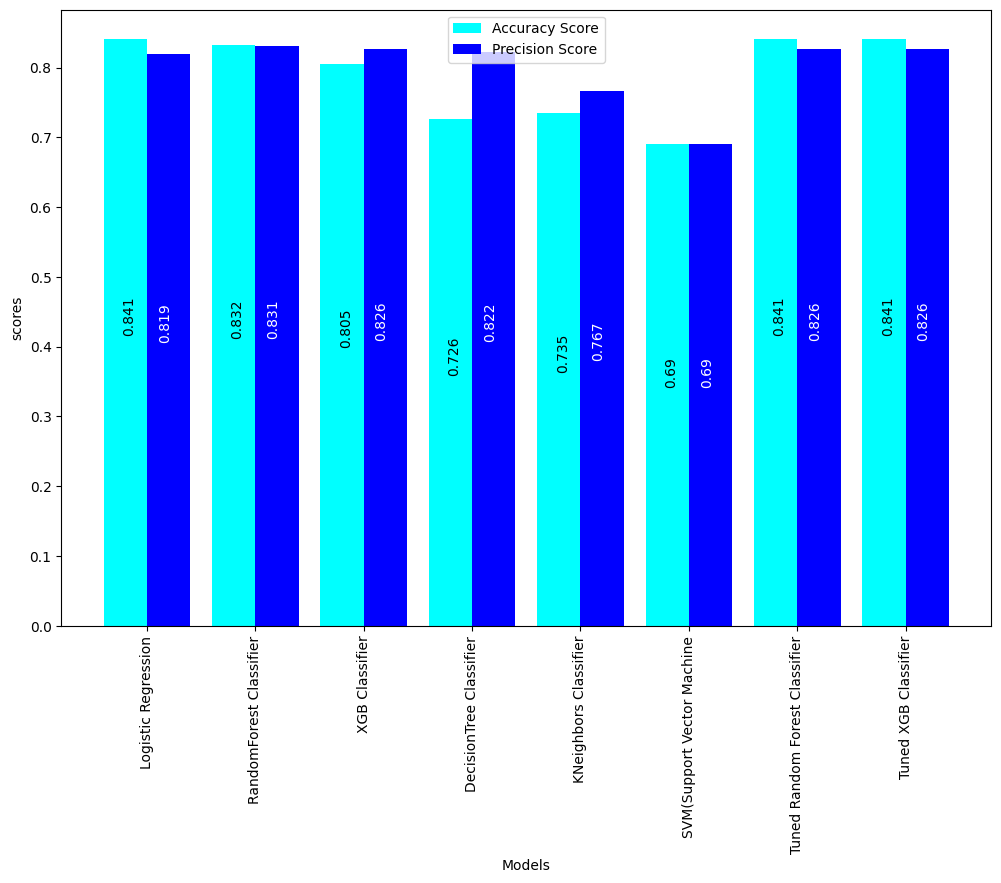

In [13]:
# Plotting bar plot to compare different evaluation metrics

models = ['Logistic Regression','RandomForest Classifier','XGB Classifier','DecisionTree Classifier','KNeighbors Classifier','SVM(Support Vector Machine','Tuned Random Forest Classifier','Tuned XGB Classifier']
acc_score = np.round(acc_score, decimals = 3)
pre_score = np.round(pre_score, decimals = 3)
x = np.arange(8)
width = 0.4

def acc_labels(x, y):
    for i in range(len(x)):
        plt.text(i - 0.1, y[i] / 2, y[i], ha='right', color = 'black', rotation = 90)
def pre_labels(x, y):
    for i in range(len(x)):
        plt.text(i + 0.1, y[i] / 2, y[i], ha='left',color='white', rotation = 90 )
# plot data
plt.figure(figsize=(12, 8))
plt.bar(x - 0.2, acc_score, width, color='cyan')
acc_labels(x, acc_score)
plt.bar(x + 0.2, pre_score, width, color ='blue')
pre_labels(x, pre_score)
plt.xticks(x, models, rotation =90)
plt.xlabel('Models')
plt.ylabel('scores')
plt.legend(['Accuracy Score','Precision Score'])
plt.show()

### Step 5: Best Model Selection

After performing hyperparameter tuning and evaluating multiple models, including Logistic Regression, Random Forest, and XGBoost, we compared their performance on the test set using key classification metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

Both the Random Forest Classifier and XGBoost Classifier achieved similar results. However, for this project, we selected the **Random Forest Classifier** as the best model based on the following considerations:

- **Interpretability**: Random Forest provides clearer insights into feature importance, which is crucial in financial applications like loan approval, where decisions must be explainable.
- **Performance**: It delivered strong predictive performance with balanced precision and recall, indicating reliability in both approving eligible applicants and rejecting ineligible ones.
- **Efficiency**: Random Forest is less complex to tune and faster to train compared to boosting methods like XGBoost, making it a practical choice for deployment.
- **Overfitting Control**: Due to its ensemble of decision trees with bagging, Random Forest is robust against overfitting on the dataset used.

Therefore, we proceed with the **Random Forest Classifier** as our final model for predicting loan approvals.


#### ROC and Precision-Recall Curve for Final Model

These curves help us understand how well our model separates approved vs. not-approved cases across all thresholds.


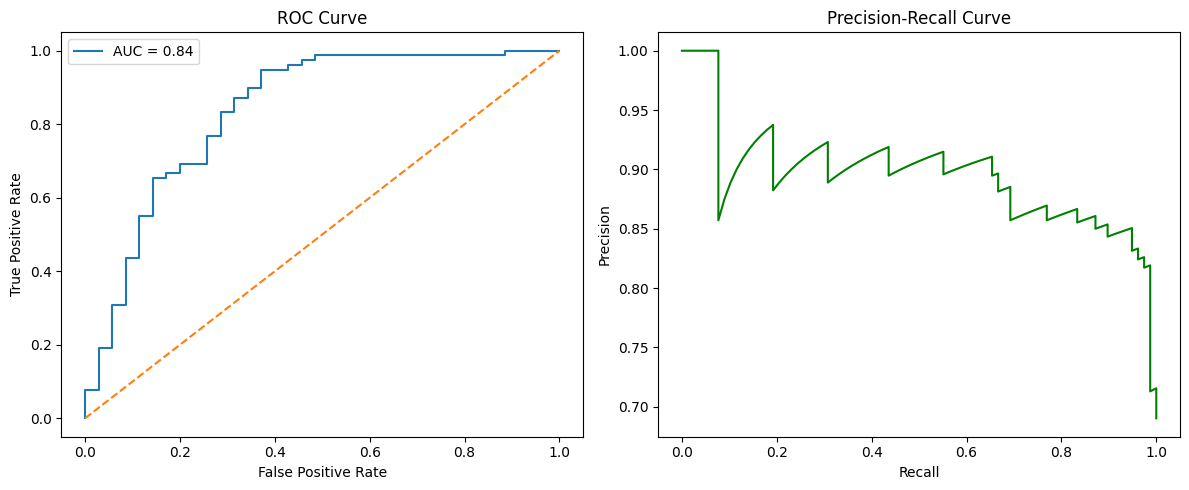

In [14]:
#Get Predicted Probabilities for positive class
y_proba = best_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.tight_layout()
plt.show()


### Adjusting Decision Threshold to Optimize Precision


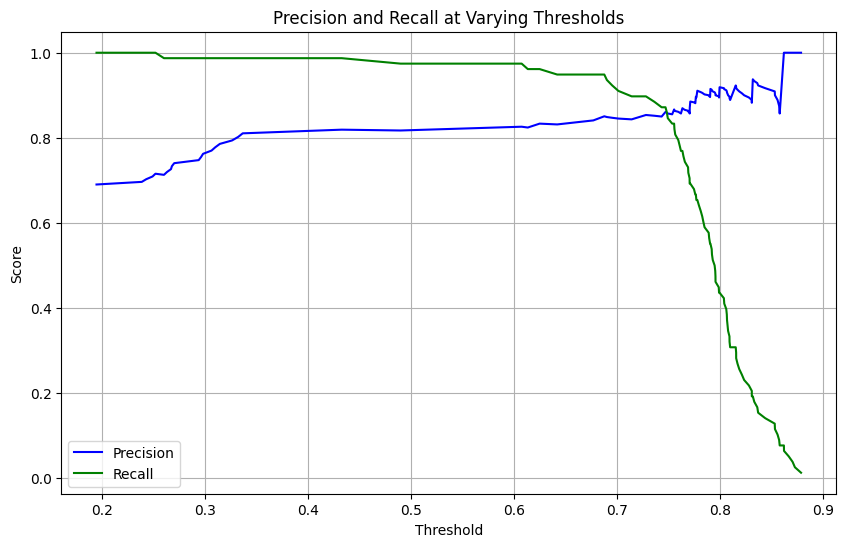

In [15]:
#Get predicted probabilities for the positive class
y_probs = best_model.predict_proba(X_test)[:,1]
                     
# Compute precision-recall pairs for differenct thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot precision-recall vs threshold
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Varying Thresholds')
plt.legend()
plt.grid()
plt.show()

In [16]:
# Choose a Higher Threshold for Better Precision
optimal_threshold = 0.68

# Apply threshold
y_pred_custom = (y_proba >= optimal_threshold).astype(int)

# Evaluate with new threshold
print('Evaluation at Optimal Threshold (', optimal_threshold,')')
print('Accuracy: ', accuracy_score(y_test, y_pred_custom))
print('Recall: ', recall_score(y_test, y_pred_custom))
print('Precision: ', precision_score(y_test, y_pred_custom))
print('F1 Score: ', f1_score(y_test, y_pred_custom))

Evaluation at Optimal Threshold ( 0.68 )
Accuracy:  0.8495575221238938
Recall:  0.9487179487179487
Precision:  0.8505747126436781
F1 Score:  0.896969696969697


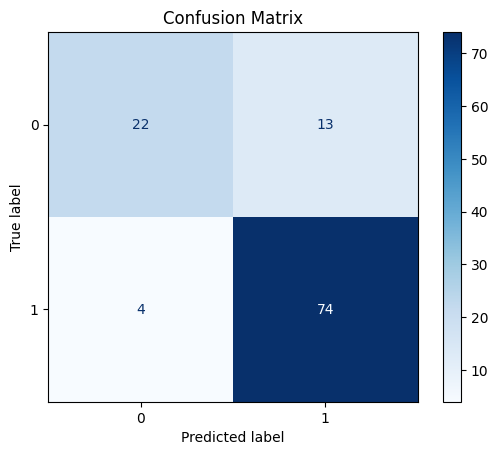

In [17]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_custom)

#Display it visually
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


## Feature Importance (Top Predictors)

We evaluate which features contribute most to the final model's decision using built-in feature importance.


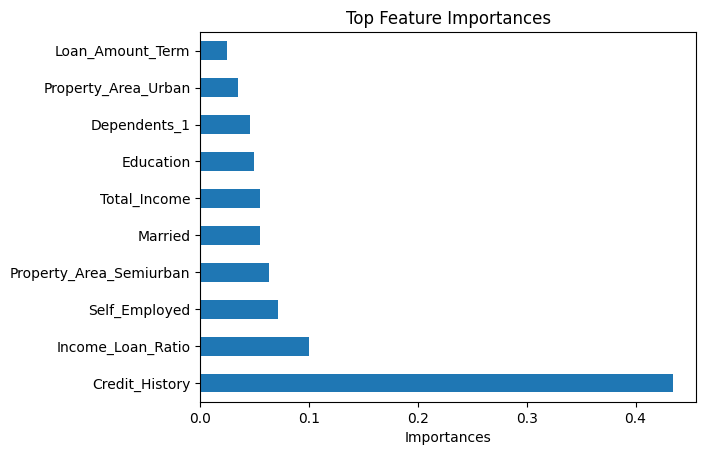

In [19]:
importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh', title='Top Feature Importances')
plt.xlabel('Importances')
plt.show()

### Top 6 Most Important Features:
1. **Credit_History** – By far the most influential feature. Applicants with a positive credit history are significantly more likely to be approved.
2. **TotalIncome** – Income level plays a key role in determining repayment ability.
3. **Income_loan_ration** – Larger Income_loan_ratio may increase the likelihood of approval.
4. **Married** – Marital status showed a correlation with approval outcomes.
5. **Education** – Graduate applicants tend to have a slightly higher approval rate.
6. **Dependents** - No of dependents applicant has directly impact approval.

#### Interpretation
- The model heavily relies on **Credit_History**, which aligns with how financial institutions assess risk.
- Income and loan amount together reflect the financial feasibility of the applicant’s request.
- Categorical features like **Married** and **Education** also contribute, indicating that socio-economic context matters in prediction.


### Step : Save the Model

In [20]:
joblib.dump(best_model, '../models/best_model.pkl')
print('Best model saved successfully!')
# Save the optimal threshold as a float or in a dictionary
joblib.dump(optimal_threshold, '../models/optimal_threshold.pkl')

Best model saved successfully!


['../models/optimal_threshold.pkl']

### Final Project Summary: Loan Approval Prediction

This project aimed to develop a machine learning model to predict whether a loan application should be approved based on applicant data. The steps and results are summarized below:

---

#### Problem Statement
The goal was to automate and improve the loan approval process using predictive modeling, reducing manual effort while minimizing financial risk.

---

#### Data Preprocessing
- Handled missing values (e.g., imputed categorical and numerical fields).
- Performed label encoding and one-hot encoding for categorical variables.
- Standardized/normalized numerical features where necessary.
- Split data into **train (80%)** and **test (20%)** sets.

---

#### Exploratory Data Analysis (EDA)
- Explored trends in applicant income, loan amount, credit history, etc.
- Identified key features affecting loan approval.
- Visualized distributions, correlations, and feature-target relationships.

---

#### Model Building & Selection
- Tried multiple models: Logistic Regression, Random Forest, XGBoost.
- Used `GridSearchCV` for **hyperparameter tuning** with 5-fold cross-validation.
- Compared models using accuracy, precision, recall, and F1-score.

---

#### Final Model: **RandomForestClassifier**
- Chosen for its balance of performance, interpretability, and robustness.
- After threshold tuning, the model achieved:
  - **Accuracy**: 0.849  
  - **Precision**: 0.85  
  - **Recall**: 0.95

---

#### Business Justification
- **High precision** reduces the number of bad loan approvals (false positives).
- **High recall** ensures most eligible applicants are approved.
- Final model strikes a good balance between business risk and opportunity.

---

